In [1]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
import itertools

## Shows the plots inline, instead of in a separate window:
%matplotlib inline

In [13]:
# in_file = "./TK_simulation_table_150330.dat"
# prefix="TK"

in_file = "/Users/abigailstevens/Dropbox/Research/cross_correlation/GX339-BQPO_ccf_table.dat"
# in_file = "/Users/abigailstevens/Dropbox/Research/cross_correlation/GX339-BQPO_ccf_table_wnans.dat"
prefix="GX339-BQPO"

# runstats_file="/Users/abigailstevens/Dropbox/Research/simulate/run_stats.dat"

ccf_resid_plot = prefix + "_CCF_resids.png"
cov_plot = prefix + "_covariance.png"
var_plot = prefix + "_variance.png"
rms_hist_plot = prefix + "_rms_hist.png"
psd_var_plot = prefix + "_psd_var.png"

table = np.loadtxt(in_file)
# tab_nans = np.isnan(table)
dt = 1.0/128.0
print "DT =", dt
print np.shape(table)
print table[3,1]

DT = 0.0078125
(536, 100)
7.750496


In [14]:
# runstats = np.loadtxt(runstats_file)
# np.shape(runstats)
# run_stats = np.mean(runstats, axis=0)
# print "Mean count rate in ci 6: %.3f" % run_stats[0]
# print "Mean count rate in ref: %.3f" % run_stats[1]
# print "Mean sum of all ci count rate: %.3f" % run_stats[2]
# print "Abs rms^2 variance of ref: %.3f" % run_stats[3]
# print "Frac rms^2 rms of ref: %.4f" % run_stats[4]

In [24]:
table = table[0:213,]

mean_ccf = np.mean(table, axis=0)
ccf_resid = table - mean_ccf
covariance = np.cov(ccf_resid, rowvar=0)
## rowvar=0 checks covariance of phase bins/time bins. rowvar=1 checks covariance between simulations or segments.
ccf_len = len(mean_ccf)
iter_len = len(np.mean(table, axis=1))

out_file = prefix + "_2Dresid.dat"
out_table = ccf_resid.flatten('C')
np.savetxt(out_file, out_table)
out_fits = prefix + "_2Dresid.fits"
print "fimgcreate bitpix=-32 naxes=%d,%d datafile=\"%s\" outfile=\"%s\" nskip=0 history=true clobber=yes" \
    % (ccf_len, iter_len, out_file, out_fits)

out_file = prefix + "_covariance.dat"
out_table = covariance.flatten('C')
np.savetxt(out_file, out_table)
out_fits = prefix + "_covariance.fits"
print "fimgcreate bitpix=-32 naxes=%d,%d datafile=\"%s\" outfile=\"%s\" nskip=0 history=true clobber=yes" \
    % (np.max(covariance.shape), np.max(covariance.shape), out_file, out_fits)

fimgcreate bitpix=-32 naxes=100,213 datafile="GX339-BQPO_2Dresid.dat" outfile="GX339-BQPO_2Dresid.fits" nskip=0 history=true clobber=yes
fimgcreate bitpix=-32 naxes=100,100 datafile="GX339-BQPO_covariance.dat" outfile="GX339-BQPO_covariance.fits" nskip=0 history=true clobber=yes


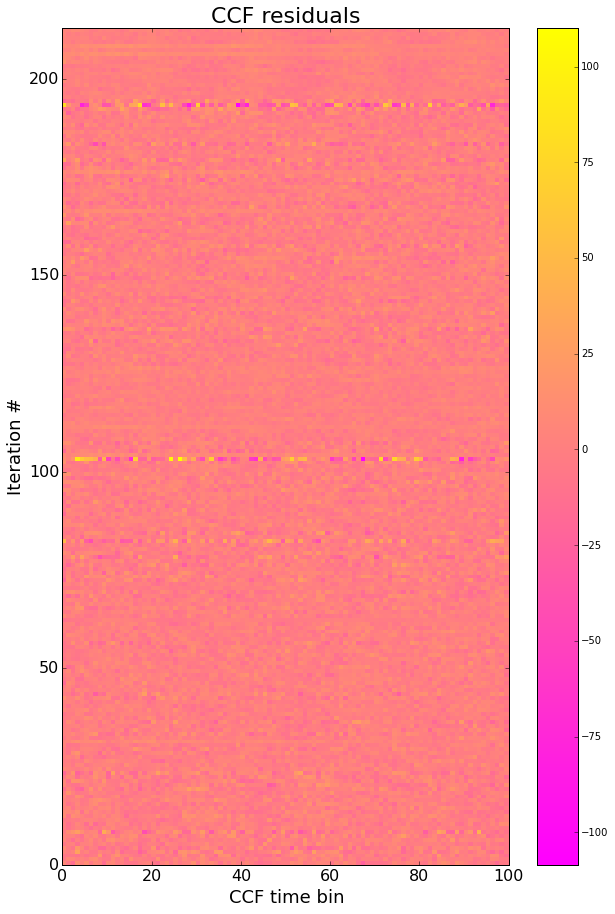

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,15))
plt.pcolor(ccf_resid, cmap='spring')
plt.colorbar()
ax.set_ylim(0, iter_len)
ax.set_xlabel('CCF time bin', fontsize=18)
ax.set_ylabel('Iteration #', fontsize=18)
ax.tick_params(axis='x', labelsize=16, bottom=True, top=True, labelbottom=True, labeltop=False)
ax.tick_params(axis='y', labelsize=16, left=True, right=True, labelleft=True, labelright=False)
ax.set_title("CCF residuals", fontsize=22)
plt.savefig(ccf_resid_plot, dpi=200)
plt.show()

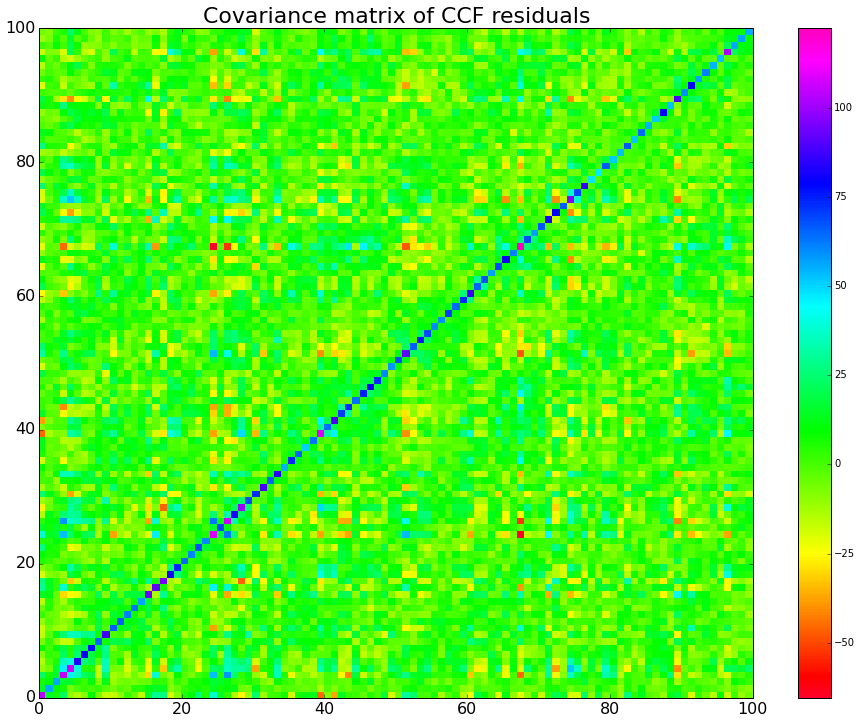

In [26]:
fig, ax = plt.subplots(1,1, figsize=(16,12))
plt.pcolor(covariance, cmap='gist_rainbow')
plt.colorbar()
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.tick_params(axis='x', labelsize=16, bottom=True, top=True, labelbottom=True, labeltop=False)
ax.tick_params(axis='y', labelsize=16, left=True, right=True, labelleft=True, labelright=False)
ax.set_title("Covariance matrix of CCF residuals", fontsize=22)
plt.savefig(cov_plot, dpi=200)
plt.show()

### Sample variance and standard error from Vaughan 2013, eqn 2.3 and 2.4

Mean ccf: [ 10.15456564   9.19603116   7.57924421   6.41348877   4.57569882]
Sample variance: [ 103.49423134   56.17137032   56.43067289  105.28672478  106.52475309]
Standard error: [ 0.69705696  0.51353223  0.51471617  0.70306747  0.70718895]


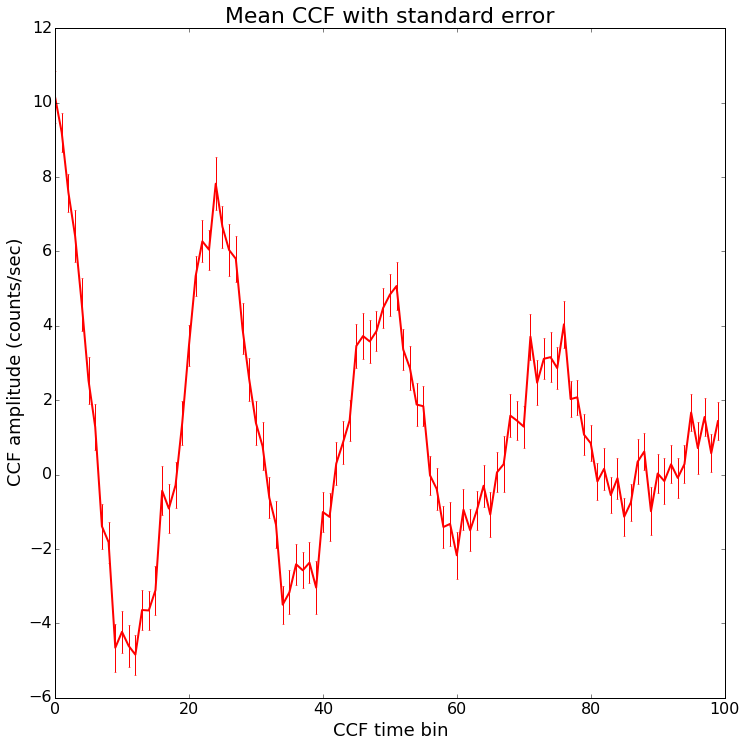

In [27]:
sample_var = np.sum(ccf_resid**2, axis=0) / float(iter_len-1)
standard_err = np.sqrt(sample_var/float(iter_len))

print "Mean ccf:", mean_ccf[0:5]
print "Sample variance:", sample_var[0:5]
print "Standard error:", standard_err[0:5]

fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.errorbar(np.arange(ccf_len), mean_ccf, yerr=standard_err, lw=2, c='red', elinewidth=1, capsize=1)
ax.tick_params(axis='x', labelsize=16, bottom=True, top=True, labelbottom=True, labeltop=False)
ax.tick_params(axis='y', labelsize=16, left=True, right=True, labelleft=True, labelright=False)
ax.set_xlabel("CCF time bin", fontsize=18)
ax.set_ylabel("CCF amplitude (counts/sec)", fontsize=18)
ax.set_title("Mean CCF with standard error", fontsize=22)
plt.show()

In [19]:
diag = np.diagonal(covariance)
diag_mean = np.mean(diag)
print "Mean of the diagonal elements (i.e., variance):", diag_mean
off_diag = np.tril(covariance)
print "Mean of the off-diagonal elements (cross-terms):", np.mean(off_diag)

Mean of the diagonal elements (i.e., variance): 69.7239810713
Mean of the off-diagonal elements (cross-terms): 1.50230008693


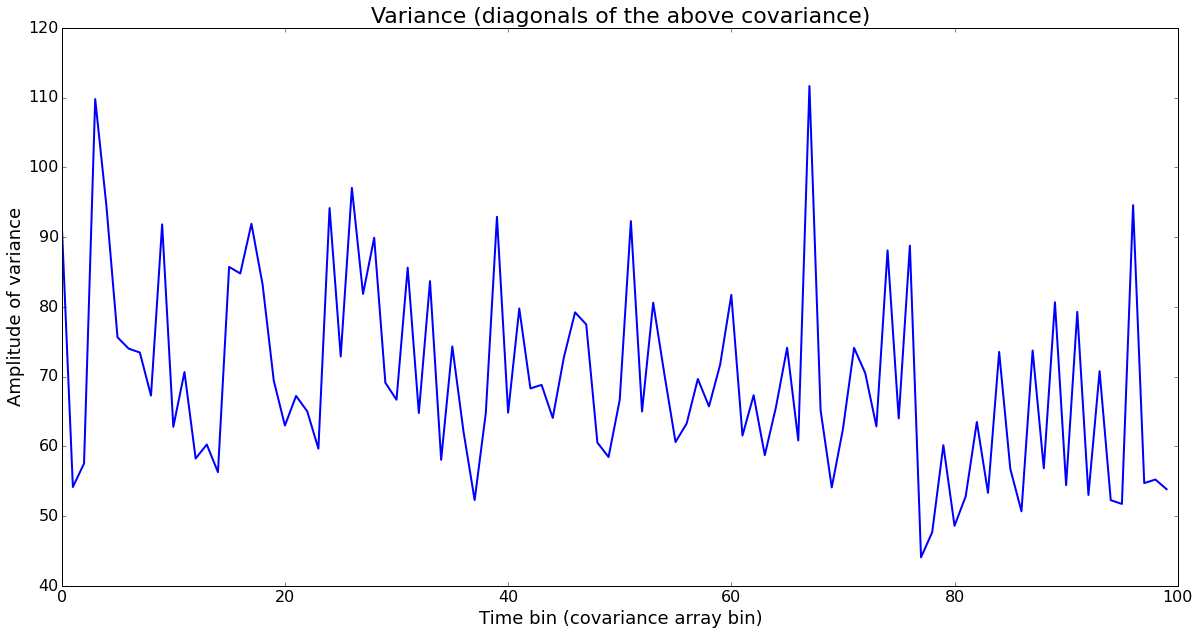

In [20]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot(np.arange(len(diag)), diag, lw=2)
ax.tick_params(axis='x', labelsize=16, bottom=True, top=True, labelbottom=True, labeltop=False)
ax.tick_params(axis='y', labelsize=16, left=True, right=True, labelleft=True, labelright=False)
ax.set_xlabel("Time bin (covariance array bin)", fontsize=18)
ax.set_ylabel("Amplitude of variance", fontsize=18)
ax.set_title("Variance (diagonals of the above covariance)", fontsize=22)
plt.savefig(var_plot, dpi=200)
plt.show()

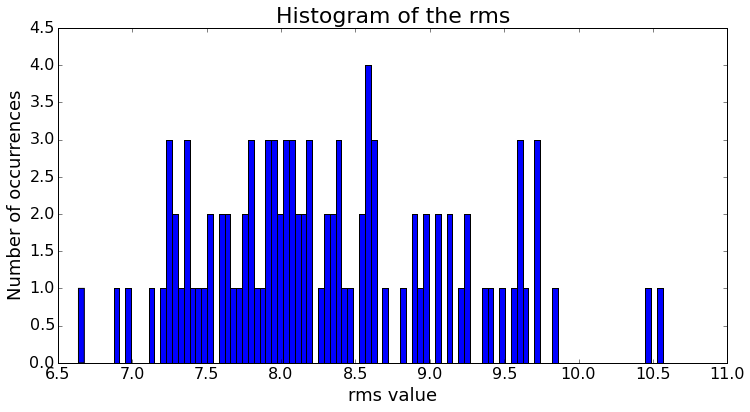

In [21]:
rms = np.sqrt(diag)
fig, ax = plt.subplots(1, 1, figsize=(12,6))
h, bins, patches = ax.hist(rms, bins=len(diag))
ax.set_ylim(0,np.max(h)+0.5)
ax.tick_params(axis='x', labelsize=16, bottom=True, top=True, labelbottom=True, labeltop=False)
ax.tick_params(axis='y', labelsize=16, left=True, right=True, labelleft=True, labelright=False)
ax.set_xlabel("rms value", fontsize=18)
ax.set_ylabel("Number of occurrences", fontsize=18)
ax.set_title("Histogram of the rms", fontsize=22)
plt.savefig(rms_hist_plot, dpi=200)
plt.show()

In [22]:
FT = fftpack.fft(diag - diag_mean)
power = np.absolute(FT)**2
freq = fftpack.fftfreq(len(power), d=dt)
nyq_ind = np.argmax(freq)+1
power = power[0:nyq_ind+1]
freq = np.abs(freq[0:nyq_ind+1])

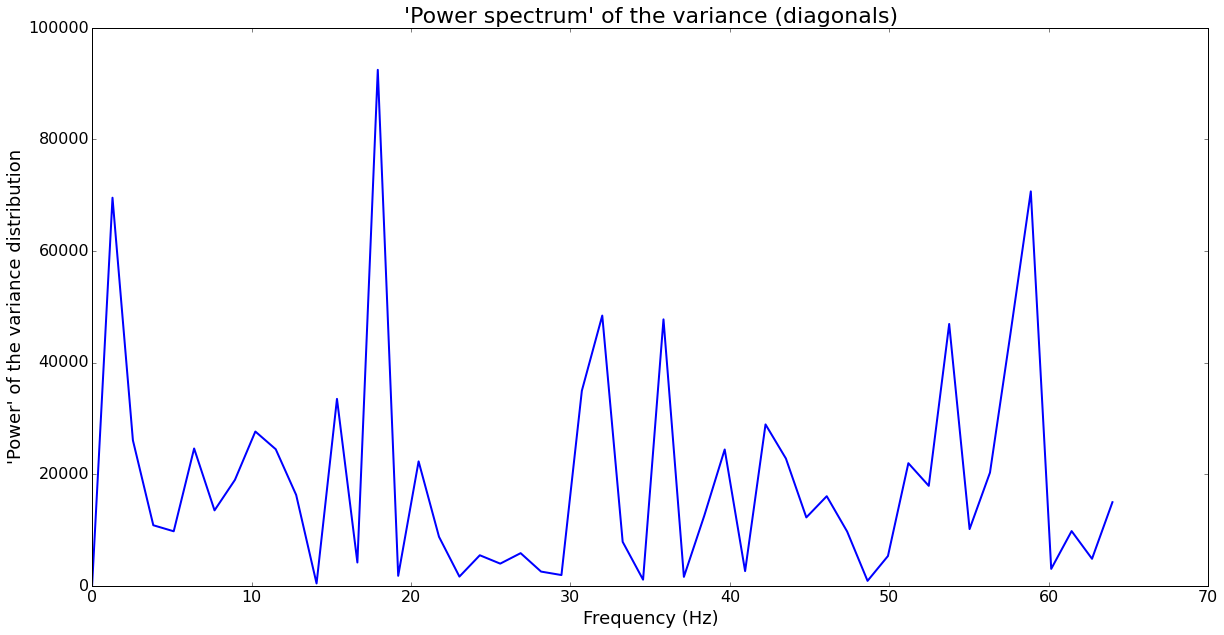

In [23]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.plot(freq, power, lw=2)
ax.tick_params(axis='x', labelsize=16, bottom=True, top=True, labelbottom=True, labeltop=False)
ax.tick_params(axis='y', labelsize=16, left=True, right=True, labelleft=True, labelright=False)
ax.set_xlabel("Frequency (Hz)", fontsize=18)
ax.set_ylabel("'Power' of the variance distribution", fontsize=18)
ax.set_title("'Power spectrum' of the variance (diagonals)", fontsize=22)
plt.savefig(psd_var_plot, dpi=200)
plt.show()

In [28]:
4953.32503516/5029.74970657

0.9848054722663094